<a href="https://colab.research.google.com/github/MorganGautherot/Machine_Learning_Courses/blob/master/Random_Forest_%26_boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random forest

Vous avez maintenant une meilleure compréhension de l'arbre de décision. Vous allez travailler avec un modèle qui peut générer plusieurs arbres et les utiliser pour obtenir des prédictions plus précises pour la régression et la classification.

### Importation des packages

In [1]:
# Load the library with the iris dataset
from sklearn.datasets import load_iris

# Load scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier

# Load pandas
import pandas as pd

# Load numpy
import numpy as np

# Compute accurasy_score
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Set random seed
np.random.seed(0)

### Load data

In [2]:
# Create an object called iris with the iris data
iris = load_iris()

# Create a dataframe with the four feature variables
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# View the top 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# Add a new column with the species names, this is what we are going to try to predict
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# View the top 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Train Test Split

Use `train_test_split` to split your data into train and test dataset.

If you need help feel free to check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

In [4]:
### Your code start here ###

# Use .iloc to select only X data
X = df.iloc[:, :4]

# Use pd.factorize the target value into 0, 1, 2 classes.
y = pd.factorize(df['species'])[0]

# split train test using skleanr test_size = 0.33, and random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Your code end here ###

In [5]:
# Show the number of observations for the test and training dataframes
print('Number of observations in the training data:', len(X_train))
print('Number of observations in the test data:',len(X_test))

Number of observations in the training data: 100
Number of observations in the test data: 50


### Train model

Intialisez votre modèle de Random Forest avec la fonction `RandomForestClassifier` de sklearn.

N'hésitez pas à vous servir de la [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [6]:
# Instantiate model with 1000 decision trees and random state = 42
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)

RandomForestClassifier(n_estimators=1000, random_state=42)

Entraînement du modèle

In [ ]:
rf.fit(X_train, y_train)

### Prédiction du modèle sur le jeu d'entraînement et le jeu de test.

In [7]:
# Use the forest's predict method on the test data
y_predict_train = rf.predict(X_train)
y_predict_test = rf.predict(X_test)

### Calculer la précision des prédictions d'entraînement et de test

Il est maintenant temps de calculer le `accuracy_score`.

N'hésitez pas à consulter la [doc](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) si vous avez besoin de plus d'informations.

In [8]:
### Your code start here ###
accuracy_train = accuracy_score(y_train, y_predict_train)
accuracy_test = accuracy_score(y_test, y_predict_test)
### Your code end here ###

print(accuracy_train)
print(accuracy_test)

1.0
0.98


### Decision Boundary

<ipython-input-9-78fe3a929fc8>:37: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipython-input-9-78fe3a929fc8>:37: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipython-input-9-78fe3a929fc8>:37: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipython-input-9-78fe3a929fc8>:37: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipython-input-9-78fe3a929fc8>:37: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipython-i

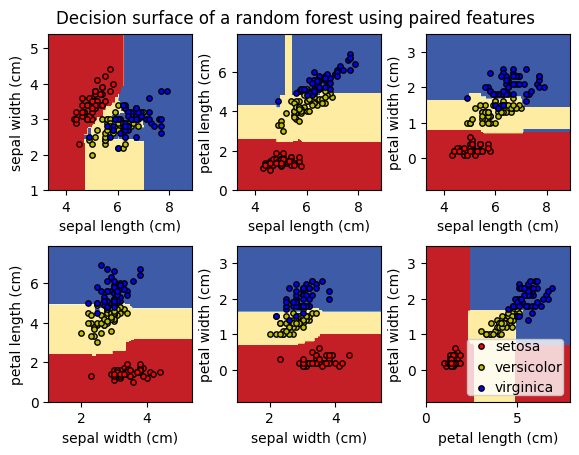

In [9]:
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    rf = RandomForestClassifier(n_estimators = 1000, random_state = 42).fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = rf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a random forest using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()